In [240]:
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt

In [241]:
# reads training dataset
training_data = pd.read_csv("C:/Users/vidas/OneDrive/University/COMP 542 - Machine Learning/Group Project/training_set.csv")

In [242]:
# reads test dataset
test_data = pd.read_csv("C:/Users/vidas/OneDrive/University/COMP 542 - Machine Learning/Group Project/test_set.csv")

In [243]:
#split the training data
training_x = training_data.iloc[:, 2:-1]
training_y = training_data.iloc[:, 6:7]



In [244]:
#split the test data
test_x = test_data.iloc[:, 2:-1]
test_y = test_data.iloc[:, 6:7]

In [245]:
y = training_data.iloc[:, [6]].values
x = training_data.iloc[:, [2,3,4,5]]


y_train = training_y.values
x_train = training_x.values
y_test = test_y.values
x_test = test_x.values

#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    



In [246]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [247]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [248]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  


In [249]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2413    5  258]
 [   2 1067   62]
 [ 125  112  814]]
              precision    recall  f1-score   support

           1       0.95      0.90      0.93      2676
           2       0.90      0.94      0.92      1131
           3       0.72      0.77      0.75      1051

    accuracy                           0.88      4858
   macro avg       0.86      0.87      0.86      4858
weighted avg       0.89      0.88      0.89      4858



In [250]:
from sklearn.model_selection import cross_val_score

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  


# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(x_train, y_train, sm_tree_depths)


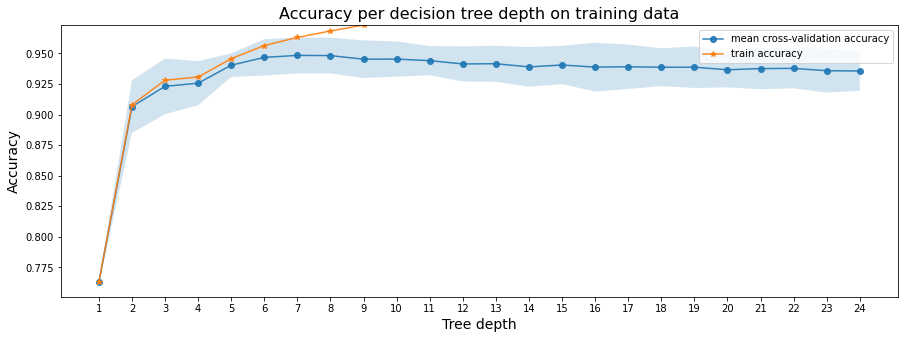

In [251]:

# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')

In [252]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-7 tree achieves the best mean cross-validation accuracy 94.84158 +/- 0.73713% on training dataset


In [253]:
# function for training and evaluating a tree
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=depth).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', depth)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate the best depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(x_train, y_train, 
                                                                          x_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  7
Accuracy, Training Set:  96.31038 %
Accuracy, Test Set:  92.6513 %


In [254]:
decision_tree = DecisionTreeClassifier(max_depth=sm_best_tree_depth).fit(x_train, y_train)
#Predicting the test set result  
y_pred= decision_tree.predict(x_test)  

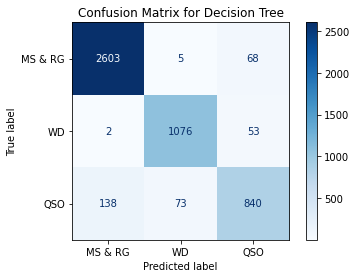

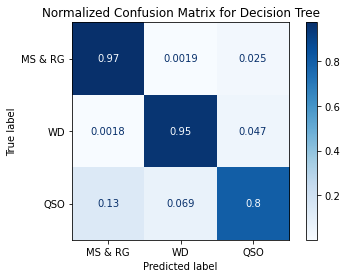

In [255]:
class_names = ['MS & RG', 'WD', 'QSO']

titles_options = [("Confusion Matrix for Decision Tree", None),("Normalized Confusion Matrix for Decision Tree", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(decision_tree, x_test, y_test, display_labels=class_names,cmap=plt.cm.Blues,normalize=normalize)
    disp.ax_.set_title(title)
    
plt.show()

In [256]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      0.97      0.96      2676
           2       0.93      0.95      0.94      1131
           3       0.87      0.80      0.83      1051

    accuracy                           0.93      4858
   macro avg       0.92      0.91      0.91      4858
weighted avg       0.93      0.93      0.93      4858

